# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
# Set the directory that you install Tennis.app
env = UnityEnvironment(file_name="../../Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.09000000171363354


When finished, you can close the environment.

In [ ]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import time
import sys
from collections import deque
from maddpg_agent import mAgent
agent = mAgent(2, state_size, action_size, random_seed=10)

In [8]:
def maddpg(n_episodes=3000, max_t=2000):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        agent_scores = np.zeros(num_agents)
        
        for t_step in range(max_t):
            actions = agent.act(states)
            next_env_info = env.step(actions)[brain_name]
            next_states, rewards, dones = next_env_info.vector_observations, next_env_info.rewards, next_env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            
            agent_scores = agent_scores + rewards      
            states = next_states
            if np.any(dones):
                break;
   
        best_score = np.max(agent_scores)
        scores_deque.append(best_score)
        scores.append(best_score)
        
        epi_score = np.mean(scores_deque)
        if i_episode % 100 == 0:
            print('Episode %d\t Scores: %s\tAvg Score %.2f'%(i_episode, ['%.2f'%sc for sc in agent_scores], np.mean(scores_deque)))
        
        if i_episode > 100 and epi_score >=0.5:
            if epi_score > max_score:
                max_score = epi_score           
                agent.save();
            print('Episode %d\t Scores: %s\tAvg Score %.2f'%(i_episode, ['%.2f'%sc for sc in agent_scores], np.mean(scores_deque)))

    return scores;

In [9]:
scores = maddpg()

/Users/jinpark/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	 Scores: ['0.00', '-0.01']	Avg Score 0.01
Episode 200	 Scores: ['-0.01', '0.00']	Avg Score 0.00
Episode 300	 Scores: ['0.00', '-0.01']	Avg Score 0.00
Episode 400	 Scores: ['0.00', '0.09']	Avg Score 0.02
Episode 500	 Scores: ['-0.01', '0.00']	Avg Score 0.07
Episode 600	 Scores: ['0.00', '-0.01']	Avg Score 0.06
Episode 700	 Scores: ['0.00', '-0.01']	Avg Score 0.02
Episode 800	 Scores: ['0.00', '-0.01']	Avg Score 0.01
Episode 900	 Scores: ['-0.01', '0.00']	Avg Score 0.01
Episode 1000	 Scores: ['0.00', '-0.01']	Avg Score 0.02
Episode 1100	 Scores: ['-0.01', '0.00']	Avg Score 0.03
Episode 1200	 Scores: ['0.00', '-0.01']	Avg Score 0.04
Episode 1300	 Scores: ['0.20', '0.09']	Avg Score 0.07
Episode 1400	 Scores: ['0.00', '0.09']	Avg Score 0.07
Episode 1500	 Scores: ['0.10', '-0.01']	Avg Score 0.09
Episode 1600	 Scores: ['0.00', '0.09']	Avg Score 0.11
Episode 1700	 Scores: ['0.00', '0.09']	Avg Score 0.09
Episode 1800	 Scores: ['-0.01', '0.10']	Avg Score 0.11
Episode 1900	 Scores: ['

Episode 2272	 Scores: ['0.10', '-0.01']	Avg Score 0.73
Episode 2273	 Scores: ['0.29', '0.30']	Avg Score 0.71
Episode 2274	 Scores: ['0.20', '0.19']	Avg Score 0.69
Episode 2275	 Scores: ['0.10', '-0.01']	Avg Score 0.67
Episode 2276	 Scores: ['0.10', '-0.01']	Avg Score 0.64
Episode 2277	 Scores: ['0.10', '-0.01']	Avg Score 0.63
Episode 2278	 Scores: ['2.60', '2.60']	Avg Score 0.65
Episode 2279	 Scores: ['2.50', '2.39']	Avg Score 0.67
Episode 2280	 Scores: ['1.09', '1.20']	Avg Score 0.68
Episode 2281	 Scores: ['2.30', '2.19']	Avg Score 0.68
Episode 2282	 Scores: ['2.60', '2.60']	Avg Score 0.70
Episode 2283	 Scores: ['0.90', '0.89']	Avg Score 0.69
Episode 2284	 Scores: ['2.50', '2.49']	Avg Score 0.69
Episode 2285	 Scores: ['0.00', '-0.01']	Avg Score 0.67
Episode 2286	 Scores: ['0.30', '0.29']	Avg Score 0.67
Episode 2287	 Scores: ['0.00', '0.09']	Avg Score 0.66
Episode 2288	 Scores: ['0.10', '-0.01']	Avg Score 0.65
Episode 2289	 Scores: ['0.09', '0.10']	Avg Score 0.65
Episode 2290	 Scores: 

Episode 2527	 Scores: ['2.60', '2.70']	Avg Score 1.09
Episode 2528	 Scores: ['1.40', '1.29']	Avg Score 1.10
Episode 2529	 Scores: ['0.10', '0.09']	Avg Score 1.10
Episode 2530	 Scores: ['1.20', '1.19']	Avg Score 1.11
Episode 2531	 Scores: ['0.29', '0.40']	Avg Score 1.12
Episode 2532	 Scores: ['0.19', '0.30']	Avg Score 1.11
Episode 2533	 Scores: ['1.00', '0.89']	Avg Score 1.12
Episode 2534	 Scores: ['0.59', '0.70']	Avg Score 1.13
Episode 2535	 Scores: ['0.99', '1.10']	Avg Score 1.12
Episode 2536	 Scores: ['0.39', '0.50']	Avg Score 1.12
Episode 2537	 Scores: ['0.10', '-0.01']	Avg Score 1.12
Episode 2538	 Scores: ['0.40', '0.39']	Avg Score 1.12
Episode 2539	 Scores: ['0.10', '-0.01']	Avg Score 1.11
Episode 2540	 Scores: ['0.10', '-0.01']	Avg Score 1.10
Episode 2541	 Scores: ['0.70', '0.69']	Avg Score 1.08
Episode 2542	 Scores: ['0.10', '-0.01']	Avg Score 1.07
Episode 2543	 Scores: ['0.70', '0.69']	Avg Score 1.06
Episode 2544	 Scores: ['0.28', '0.30']	Avg Score 1.04
Episode 2545	 Scores: ['

Episode 2881	 Scores: ['0.19', '0.20']	Avg Score 1.00
Episode 2882	 Scores: ['-0.01', '0.10']	Avg Score 1.00
Episode 2883	 Scores: ['2.60', '2.60']	Avg Score 1.02
Episode 2884	 Scores: ['2.70', '2.60']	Avg Score 1.03
Episode 2885	 Scores: ['0.30', '0.39']	Avg Score 1.03
Episode 2886	 Scores: ['0.59', '0.70']	Avg Score 1.04
Episode 2887	 Scores: ['0.10', '-0.01']	Avg Score 1.04
Episode 2888	 Scores: ['0.00', '-0.01']	Avg Score 1.03
Episode 2889	 Scores: ['0.09', '0.10']	Avg Score 1.03
Episode 2890	 Scores: ['0.39', '0.50']	Avg Score 1.02
Episode 2891	 Scores: ['0.09', '0.10']	Avg Score 1.02
Episode 2892	 Scores: ['0.00', '-0.01']	Avg Score 1.02
Episode 2893	 Scores: ['-0.01', '0.00']	Avg Score 1.02
Episode 2894	 Scores: ['1.40', '1.29']	Avg Score 1.03
Episode 2895	 Scores: ['0.00', '-0.01']	Avg Score 1.02
Episode 2896	 Scores: ['0.60', '0.59']	Avg Score 1.02
Episode 2897	 Scores: ['0.10', '0.09']	Avg Score 1.02
Episode 2898	 Scores: ['0.00', '-0.01']	Avg Score 1.02
Episode 2899	 Scores:

In [10]:
windowed_scores = [];
for posit in range(len(scores)):
    window_avg = np.mean(scores[:posit]) if posit < 100 else np.mean(scores[posit - 100: posit])
    windowed_scores.append(window_avg);
    
tag_point = np.argwhere(np.array(windowed_scores) >= 0.5)[0]


/Users/jinpark/anaconda3/envs/drlnd/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jinpark/anaconda3/envs/drlnd/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


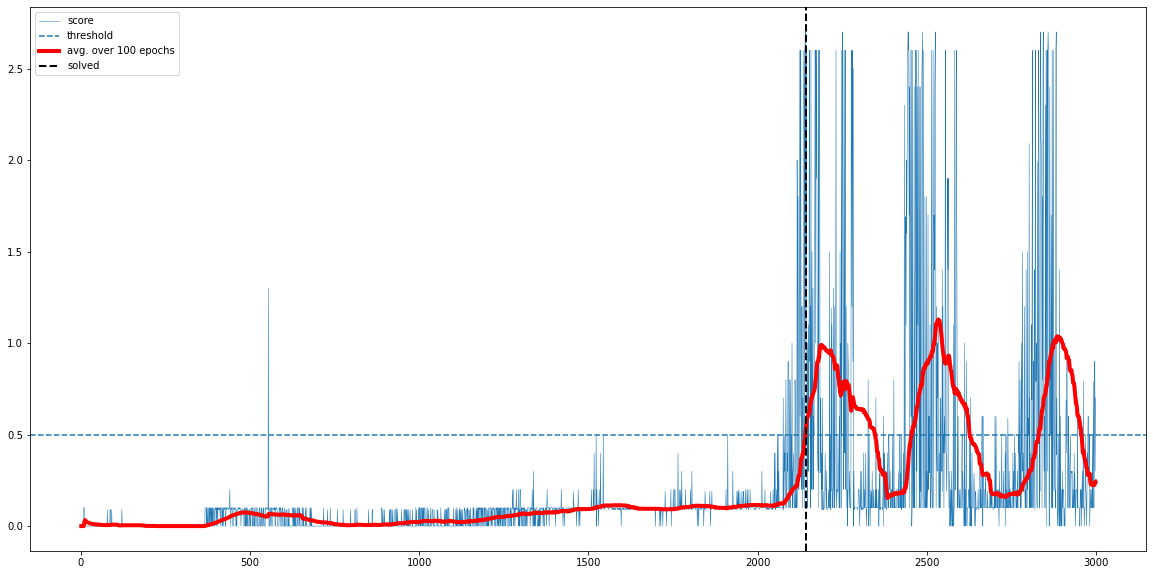

In [11]:
import matplotlib.pyplot as plt;
%matplotlib inline

plt.figure(figsize=(20,10))
plt.plot(scores, label='score', linewidth=0.5)
plt.axhline(y=0.5, linestyle='dashed', label='threshold')
plt.plot(windowed_scores, c='red', linewidth=4, label='avg. over 100 epochs')
plt.axvline(x=tag_point, linestyle='dashed', c='black', linewidth=2, label='solved')
plt.legend()

### 5. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [ ]:
agent.load()

In [14]:
for i in range(50):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        #actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        #actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        actions = agent.act(states);                      # get next action from states
        
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

/Users/jinpark/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Total score (averaged over agents) this episode: 1.095000016503036
Total score (averaged over agents) this episode: 1.7950000269338489
Total score (averaged over agents) this episode: 0.1450000023469329
Total score (averaged over agents) this episode: 2.600000038743019
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: 1.5950000239536166
Total score (averaged over agents) this episode: 0.29500000458210707
Total score (averaged over agents) this episode: 1.3950000209733844
Total score (averaged over agents) this episode: 1.6950000254437327
Total score (averaged over agents) this episode: 2.600000038743019
Total score (averaged over agents) this episode: 2.650000039488077
Total score (averaged over agents) this episode: 2.600000038743019
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode